In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 98% 146M/149M [00:04<00:00, 43.2MB/s]
100% 149M/149M [00:04<00:00, 35.4MB/s]


In [3]:
def get_class_paths(path):
    classes = []
    class_paths = []
    # Iterate through directories in the training path
    for label in os.listdir(path):
        label_path = os.path.join(path,label)

        # Check if it's a directory
        if os.path.isdir(label_path):
            # Iterate through images in the label directory
            for image in os.listdir(label_path):
                image_path = os.path.join(label_path,image)

                # Add class and path to respective lists
                classes.append(label)
                class_paths.append(image_path)

    # Create a DataFrame with the collected data
    df = pd.DataFrame({
        'Class Path': class_paths,
        'Class': classes
    })
    return df

In [ ]:
tr_df = get_class_paths('Training')
tr_df

,Class Path,Class
0,Training/pituitary/Tr-pi_0505.jpg,pituitary
1,Training/pituitary/Tr-pi_0263.jpg,pituitary
2,Training/pituitary/Tr-pi_0277.jpg,pituitary
3,Training/pituitary/Tr-pi_1169.jpg,pituitary
4,Training/pituitary/Tr-pi_0511.jpg,pituitary
...,...,...
5707,Training/meningioma/Tr-me_1053.jpg,meningioma
5708,Training/meningioma/Tr-me_0403.jpg,meningioma
5709,Training/meningioma/Tr-me_0365.jpg,meningioma
5710,Training/meningioma/Tr-me_0371.jpg,meningioma


In [ ]:
ts_df = get_class_paths('Testing')
ts_df

,Class Path,Class
0,Testing/pituitary/Te-pi_0233.jpg,pituitary
1,Testing/pituitary/Te-pi_0227.jpg,pituitary
2,Testing/pituitary/Te-pi_0019.jpg,pituitary
3,Testing/pituitary/Te-pi_0031.jpg,pituitary
4,Testing/pituitary/Te-pi_0025.jpg,pituitary
...,...,...
1306,Testing/meningioma/Te-me_0080.jpg,meningioma
1307,Testing/meningioma/Te-me_0094.jpg,meningioma
1308,Testing/meningioma/Te-me_0137.jpg,meningioma
1309,Testing/meningioma/Te-me_0123.jpg,meningioma


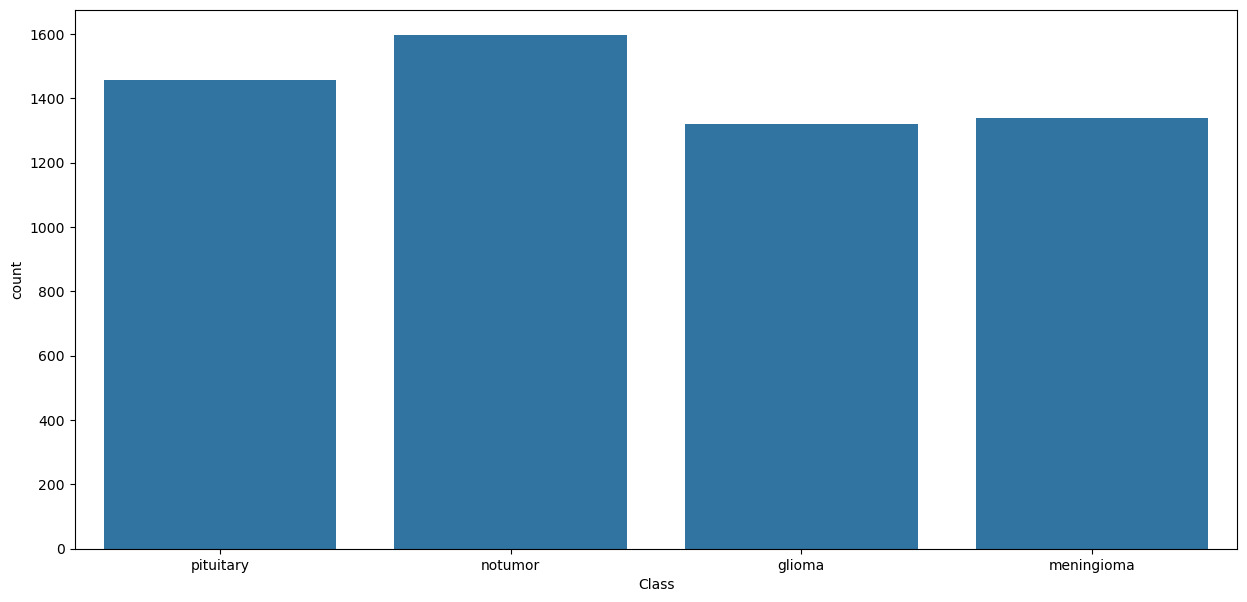

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df,x=tr_df['Class'])

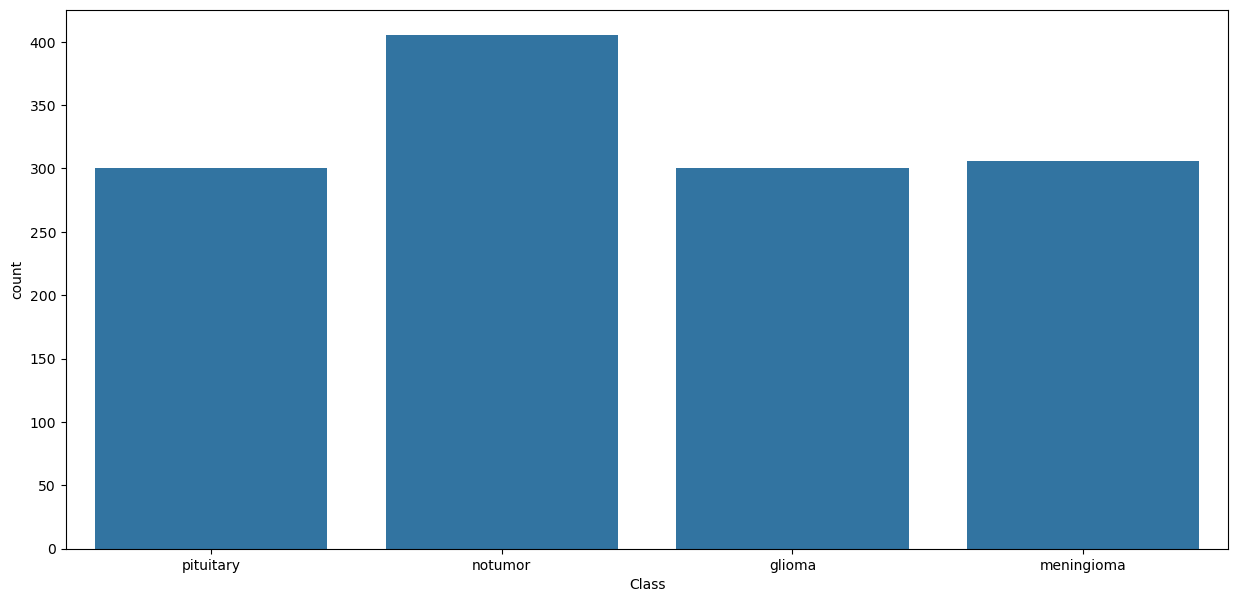

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=ts_df,x=ts_df['Class'])

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
valid_df, ts_df = train_test_split(ts_df,train_size=0.5,stratify=ts_df["Class"])
valid_df

,Class Path,Class
182,Testing/pituitary/Te-pi_0113.jpg,pituitary
1162,Testing/meningioma/Te-me_0186.jpg,meningioma
1247,Testing/meningioma/Te-me_0285.jpg,meningioma
591,Testing/notumor/Te-no_0216.jpg,notumor
310,Testing/notumor/Te-no_0333.jpg,notumor
...,...,...
355,Testing/notumor/Te-no_0245.jpg,notumor
698,Testing/notumor/Te-no_0302.jpg,notumor
619,Testing/notumor/Te-no_0266.jpg,notumor
200,Testing/pituitary/Te-pi_0104.jpg,pituitary


In [ ]:
ts_df

,Class Path,Class
1025,Testing/meningioma/Te-me_0111.jpg,meningioma
367,Testing/notumor/Te-no_0282.jpg,notumor
973,Testing/glioma/Te-glTr_0005.jpg,glioma
95,Testing/pituitary/Te-piTr_0001.jpg,pituitary
1238,Testing/meningioma/Te-me_0126.jpg,meningioma
...,...,...
864,Testing/glioma/Te-gl_0142.jpg,glioma
955,Testing/glioma/Te-gl_0107.jpg,glioma
80,Testing/pituitary/Te-pi_0091.jpg,pituitary
1243,Testing/meningioma/Te-me_0093.jpg,meningioma


In [ ]:
batch_size = 32

img_size=(299,299)
image_generator = ImageDataGenerator(rescale = 1/255, brightness_range=(0.8,1.2))

ts_gen = ImageDataGenerator(rescale=1/255)

In [ ]:
tr_gen = image_generator.flow_from_dataframe(tr_df,x_col='Class Path', y_col='Class', batch_size = batch_size, target_size=img_size)
valid_gen = image_generator.flow_from_dataframe(valid_df,x_col='Class Path', y_col='Class', batch_size = batch_size, target_size=img_size)
ts_gen = ts_gen.flow_from_dataframe(ts_df,x_col='Class Path', y_col='Class', batch_size = 16, target_size=img_size,shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


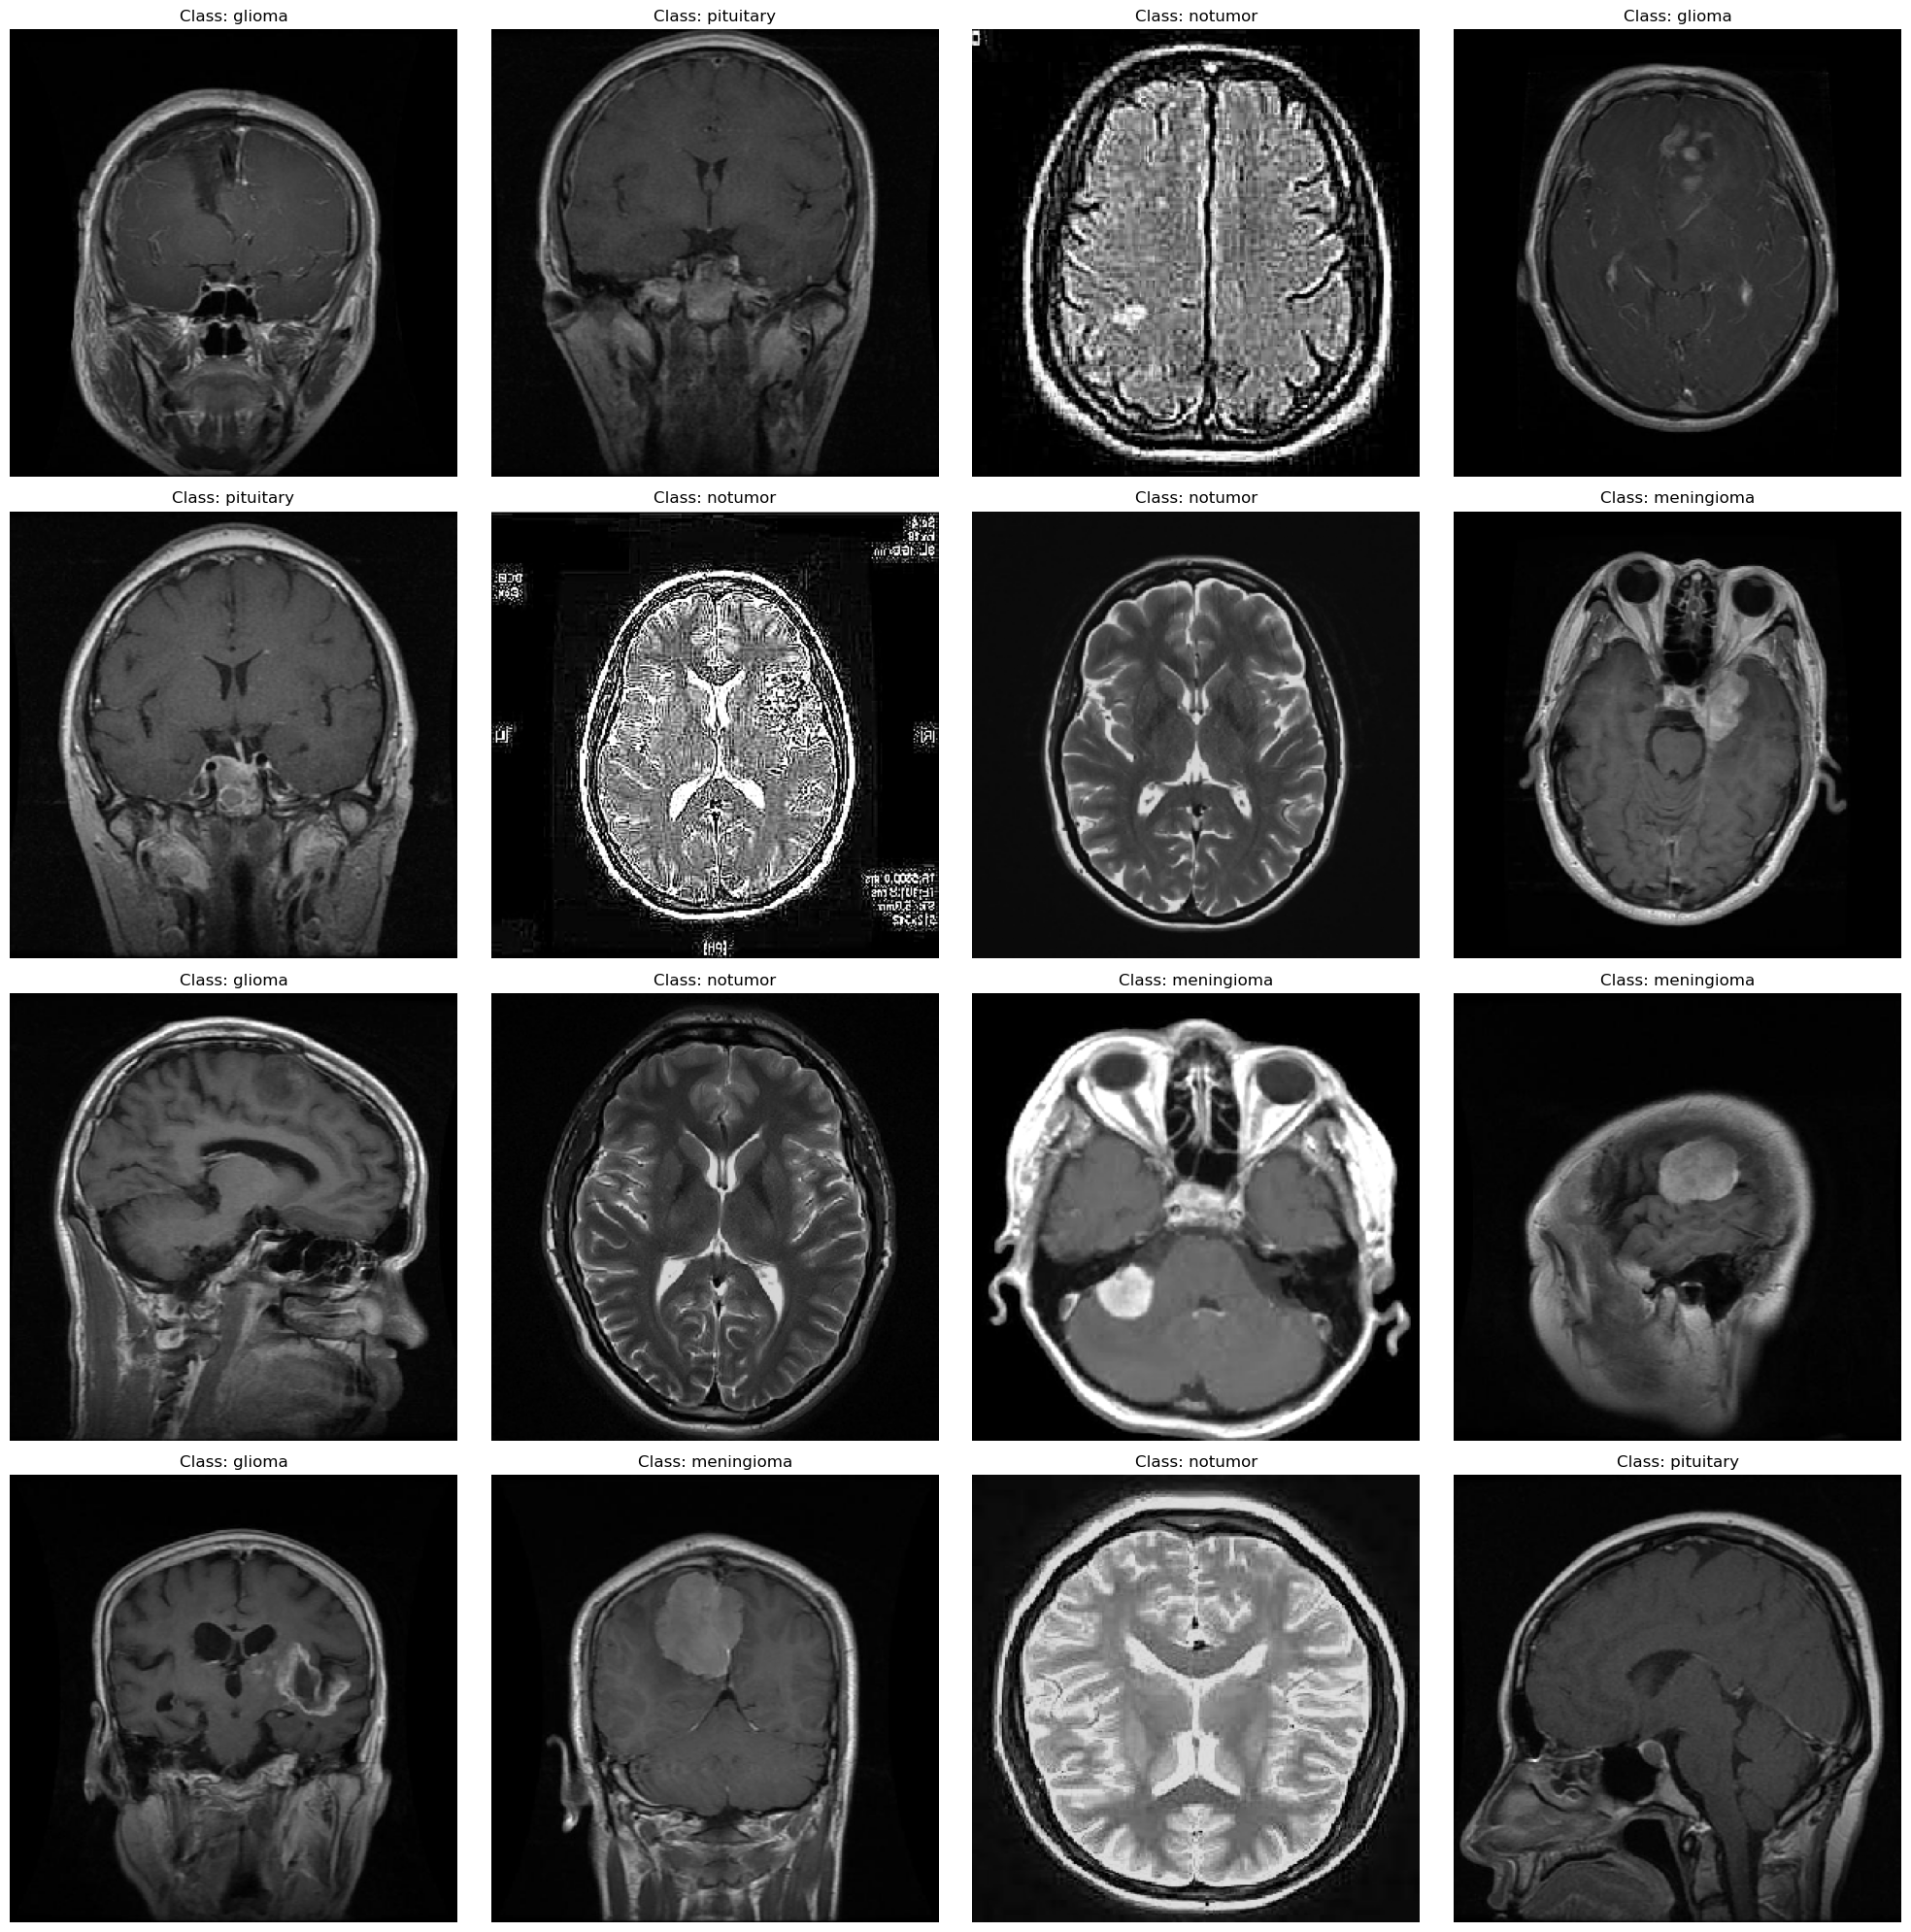

In [ ]:
plt.figure(figsize=(20,20))
for i in range(16):
    plt.subplot(4,4,i+1)
    batch = next(tr_gen)
    image = batch[0][0]
    label = batch[1][0]
    plt.imshow(image)

    # Get the class index
    class_index = np.argmax(label)

    # Get the list of class names and class indices
    class_names = list(tr_gen.class_indices.keys())
    class_indices = list(tr_gen.class_indices.values())

    # Find the index of the class_index in the list of indeices
    index_position = class_indices.index(class_index)

    # Get the class name using the index position
    class_name = class_names[index_position]

    plt.title(f"Class: {class_name}" )
    plt.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
img_shape = (299,299,3)
base_model = tf.keras.applications.Xception(input_shape=img_shape,include_top=False,weights='imagenet', pooling='max')

model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate = 0.3),
    Dense(128,activation='relu'),
    Dropout(rate = 0.25),
    Dense(4,activation='softmax')
])

In [ ]:
model.compile(Adamax(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy',Precision(),Recall()])

In [ ]:
hist = model.fit(tr_gen,epochs=3,validation_data=valid_gen)

Epoch 1/3


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 2488s 14s/step - accuracy: 0.8169 - loss: 0.5292 - precision: 0.8411 - recall: 0.7531 - val_accuracy: 0.9069 - val_loss: 0.2603 - val_precision: 0.9091 - val_recall: 0.9008
Epoch 2/3
179/179 ━━━━━━━━━━━━━━━━━━━━ 3235s 18s/step - accuracy: 0.9823 - loss: 0.0481 - precision: 0.9847 - recall: 0.9821 - val_accuracy: 0.9756 - val_loss: 0.0670 - val_precision: 0.9756 - val_recall: 0.9756
Epoch 3/3
179/179 ━━━━━━━━━━━━━━━━━━━━ 2671s 15s/step - accuracy: 0.9923 - loss: 0.0270 - precision: 0.9929 - recall: 0.9918 - val_accuracy: 0.9679 - val_loss: 0.0899 - val_precision: 0.9694 - val_recall: 0.9664


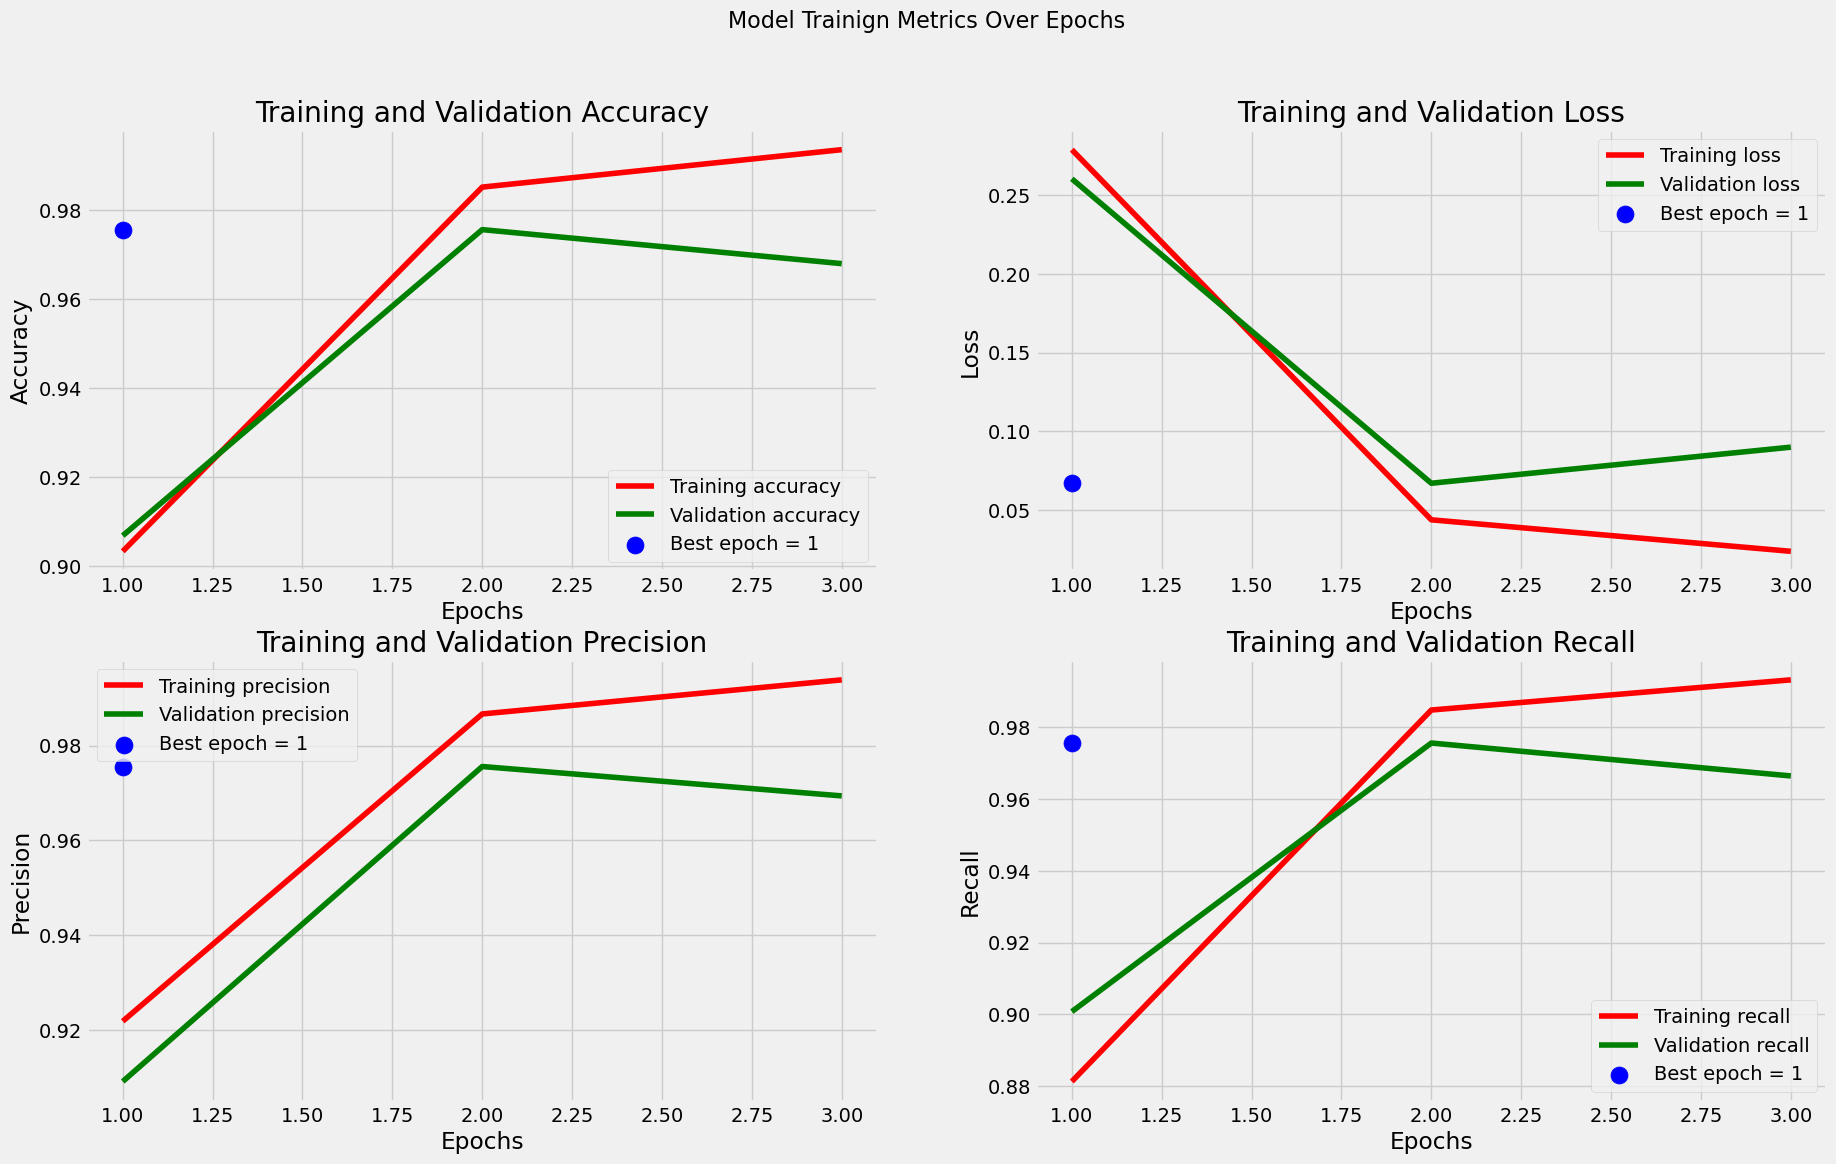

In [ ]:
# Get training and validation metrics from history
metrics = ["accuracy", "loss", "precision", "recall"]
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

# Find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
  if m == "loss":
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx
  best_values[m] = val_metrics[m][idx]

# Plot metrics
plt.figure(figsize=(20,12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics,1):
  plt.subplot(2,2,i)
  epochs = range(1, len(tr_metrics[metric])+1)

  plt.plot(epochs,tr_metrics[metric],'r',label=f'Training {metric}')
  plt.plot(epochs,val_metrics[metric],'g',label=f'Validation {metric}')
  plt.scatter(best_epochs[metric],best_values[metric],s=150,color='blue', label=f'Best epoch = {best_epochs[metric]}')
  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)
plt.suptitle('Model Trainign Metrics Over Epochs', fontsize=16)
plt.show()

In [ ]:
train_score = model.evaluate(tr_gen,verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy:{train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]*100:.4f}")
print(f"\n\nValidion Accuracy:{valid_score[1]*100:.2f}%")
print(f"Validion Loss: {valid_score[0]*100:.4f}")
print(f"\n\nTest Accuracy:{test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]*100:.4f}")


179/179 ━━━━━━━━━━━━━━━━━━━━ 441s 2s/step - accuracy: 0.9898 - loss: 0.0332 - precision: 0.9899 - recall: 0.9884
21/21 ━━━━━━━━━━━━━━━━━━━━ 59s 3s/step - accuracy: 0.9654 - loss: 0.1436 - precision: 0.9653 - recall: 0.9627
41/41 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.9558 - loss: 0.1603 - precision: 0.9558 - recall: 0.9558
Train Accuracy:98.93%
Train Loss: 3.8134


Validion Accuracy:97.40%
Validion Loss: 9.7395


Test Accuracy:95.27%
Test Loss: 17.5304


41/41 ━━━━━━━━━━━━━━━━━━━━ 35s 857ms/step


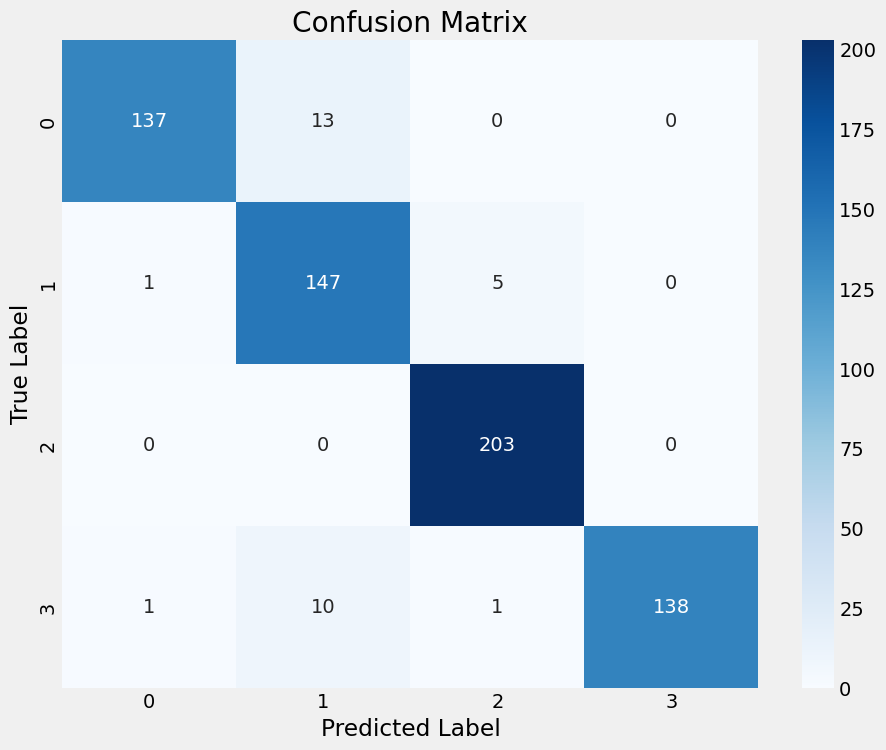

In [ ]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds,axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'notumor',
    3: 'pituitary'
}
# Then create and display the confusion matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from PIL import Image

def predict(img_path:str) -> None:
  # Get class labels
  labels = list(class_dict.keys())

  # Create figure
  plt.figure(figsize=(6,8))

  # Load and preprocess image
  img = Image.open(img_path)
  resized_img = img.resize((299,299))
  img_array = np.asarray(resized_img)
  img_array = np.expand_dims(img_array, axis=0)/255

  # Get model predictions
  predictions = model.predict(img_array)
  probabilities = list(predictions[0])

  # Get predicted class
  predicted_class_idx = np.argmax(predictions)
  predicted_class = class_dict[predicted_class_idx]

  # plot original image
  plt.subplot(2,1,1)
  plt.imshow(resized_img)
  plt.title(f"Input MRI Image\n Predicted: {predicted_class}")

  # Plot prediction probabilites
  plt.subplot(2,1,2)
  bars = plt.barh(labels,probabilities)
  plt.xlabel("Probabilities", fontsize= 15)
  plt.title("Class Probabilities")

  # Add probability labels to bars
  ax = plt.gca()
  ax.bar_label(bars, fmt="%.2f")

  plt.tight_layout()
  plt.show()

  print(f"\nPredicted tumor type: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


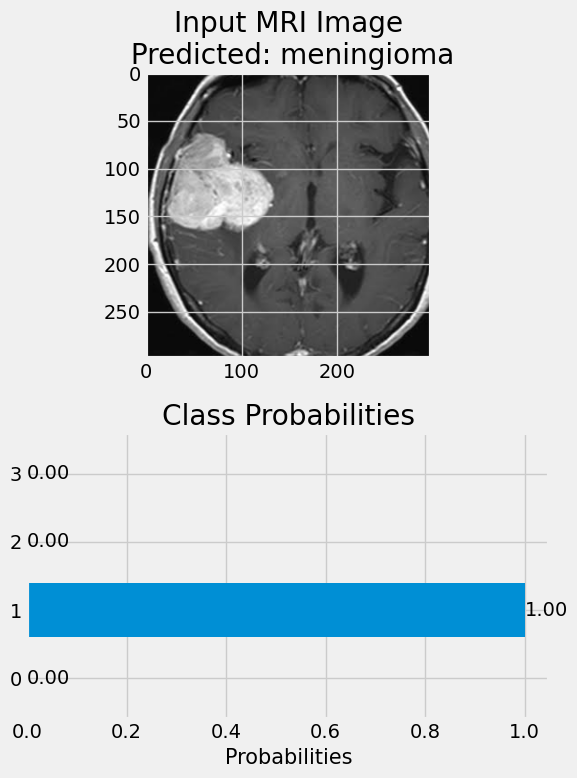


Predicted tumor type: meningioma


In [ ]:
predict("Testing/meningioma/Te-me_0025.jpg")

In [ ]:
model.save_weights("xception_model.weights.h5")

In [4]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers

In [ ]:
batch_size = 16

img_size=(224,224)
image_generator = ImageDataGenerator(rescale = 1/255, brightness_range=(0.8,1.2))

ts_gen = ImageDataGenerator(rescale=1/255)

tr_gen = image_generator.flow_from_dataframe(tr_df,x_col='Class Path', y_col='Class', batch_size = batch_size, target_size=img_size)
valid_gen = image_generator.flow_from_dataframe(valid_df,x_col='Class Path', y_col='Class', batch_size = batch_size, target_size=img_size)
ts_gen = ts_gen.flow_from_dataframe(ts_df,x_col='Class Path', y_col='Class', batch_size = 16, target_size=img_size,shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [ ]:
# Create a Sequential model
cnn_model = Sequential()

# convolutional layers
cnn_model.add(Conv2D(512,(3,3),padding='same', input_shape=(224,224,3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

cnn_model.add(Conv2D(256,(3,3),padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128,(3,3),padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64,(3,3),padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten the output for fully connected layers
cnn_model.add(Flatten())

# Fully connected layers
cnn_model.add(Dense(256,activation='relu', kernel_regularizer=regularizers.l2(0.01)))
cnn_model.add(Dropout(0.35))

cnn_model.add(Dense(4, activation='softmax')) # Output layer with 4 neurons for the 4 classes

# Compile the model
cnn_model.compile(Adamax(learning_rate=0.001),loss='categorical_crossentropy', metrics=['accuracy',Precision(),Recall()])

# Display the model summary
cnn_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 224, 224, 512)  │        14,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 112, 112, 512)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 112, 112, 256)  │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 56, 56, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 56, 56, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 56, 56, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 28, 28, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │     3,211,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,775,620 (18.22 MB)

 Trainable params: 4,775,620 (18.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = cnn_model.fit(tr_gen,epochs=8,validation_data=valid_gen) # better if epochs is greater than 5

Epoch 1/8
357/357 ━━━━━━━━━━━━━━━━━━━━ 2813s 8s/step - accuracy: 0.8970 - loss: 0.4348 - precision_4: 0.9043 - recall_4: 0.8894 - val_accuracy: 0.8947 - val_loss: 0.4278 - val_precision_4: 0.8978 - val_recall_4: 0.8855
Epoch 2/8
357/357 ━━━━━━━━━━━━━━━━━━━━ 2765s 8s/step - accuracy: 0.9143 - loss: 0.3784 - precision_4: 0.9209 - recall_4: 0.9066 - val_accuracy: 0.8931 - val_loss: 0.3991 - val_precision_4: 0.8949 - val_recall_4: 0.8840
Epoch 3/8
357/357 ━━━━━━━━━━━━━━━━━━━━ 2746s 8s/step - accuracy: 0.9358 - loss: 0.3218 - precision_4: 0.9382 - recall_4: 0.9325 - val_accuracy: 0.9221 - val_loss: 0.3587 - val_precision_4: 0.9275 - val_recall_4: 0.9176
Epoch 4/8
357/357 ━━━━━━━━━━━━━━━━━━━━ 2697s 8s/step - accuracy: 0.9564 - loss: 0.2649 - precision_4: 0.9577 - recall_4: 0.9544 - val_accuracy: 0.9496 - val_loss: 0.2880 - val_precision_4: 0.9495 - val_recall_4: 0.9481
Epoch 5/8
357/357 ━━━━━━━━━━━━━━━━━━━━ 2729s 8s/step - accuracy: 0.9662 - loss: 0.2350 - precision_4: 0.9679 - recall_4: 0.9

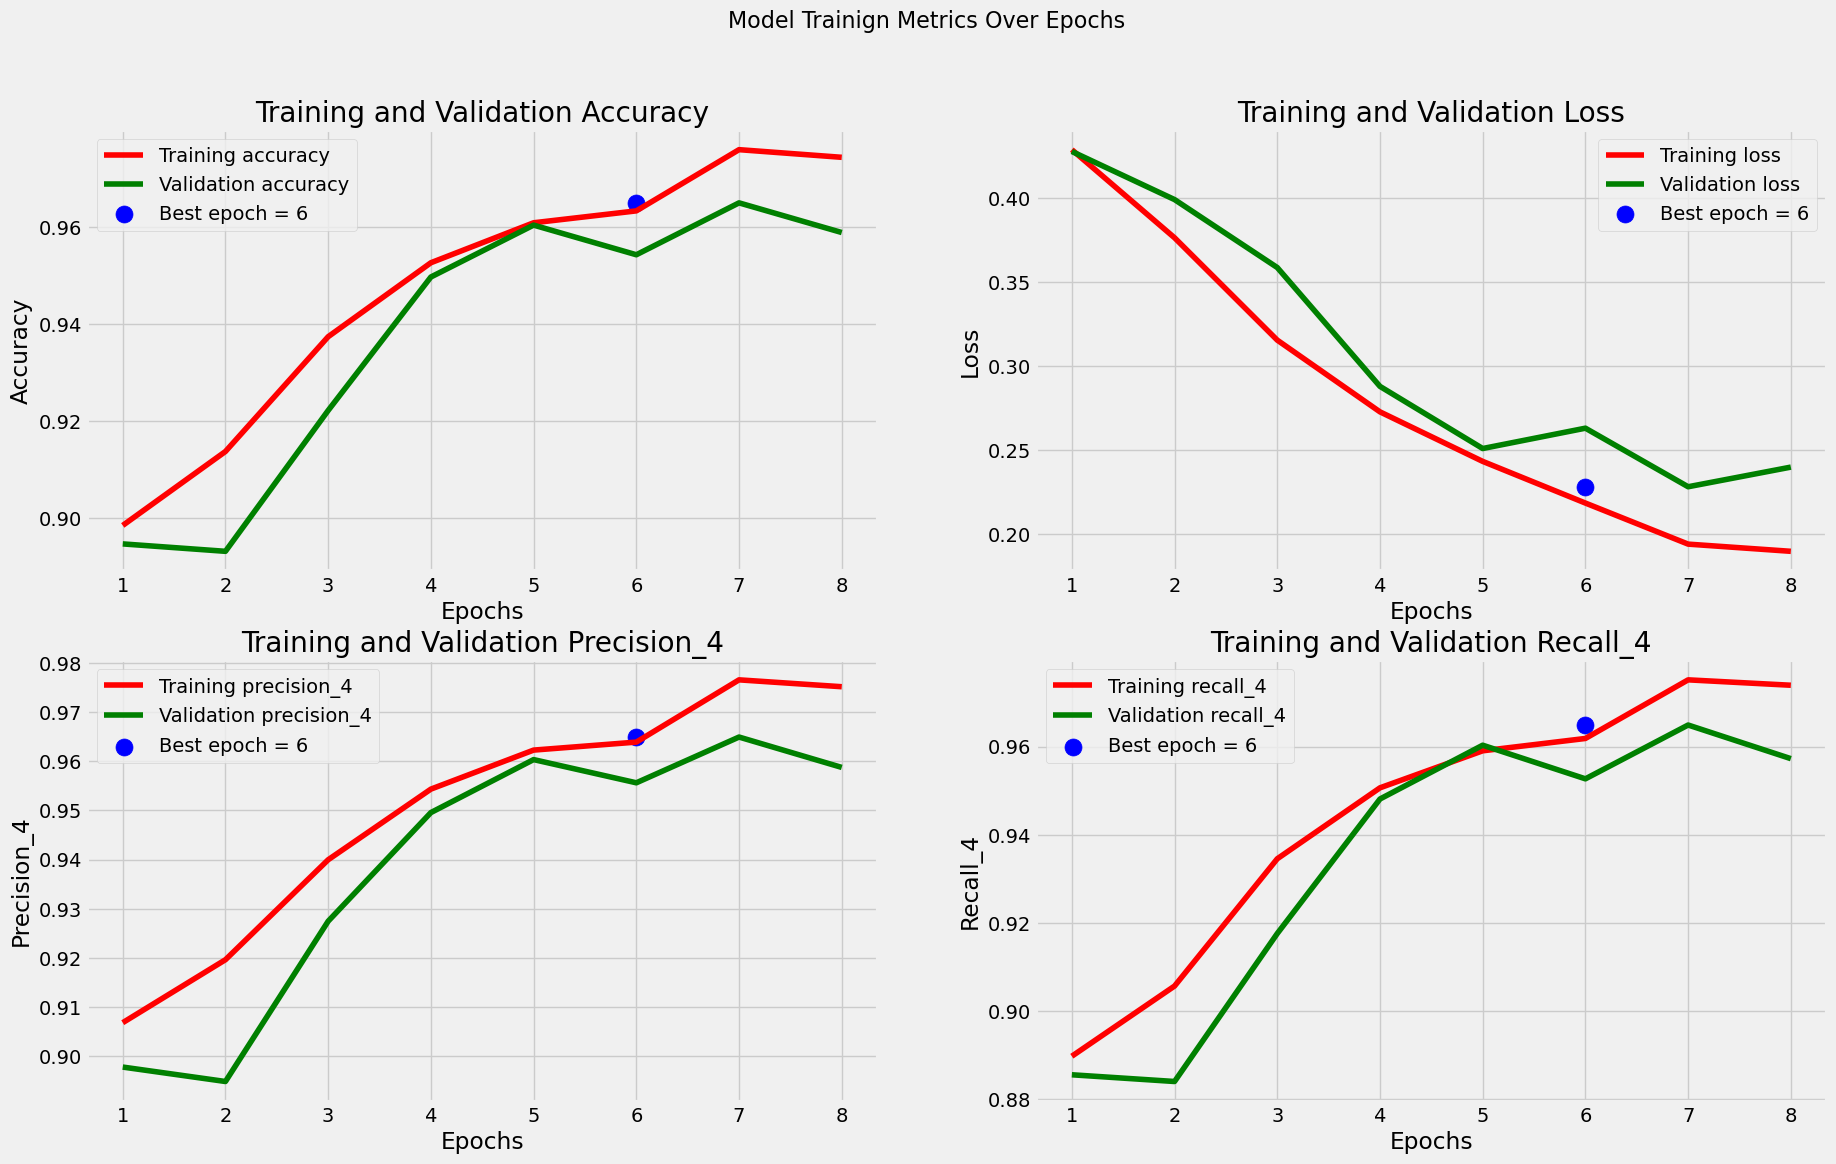

In [ ]:
# Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision_4', 'recall_4']
tr_metrics = {m: history.history[m] for m in metrics}
val_metrics = {m: history.history[f'val_{m}'] for m in metrics}

# Find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
  if m == "loss":
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx
  best_values[m] = val_metrics[m][idx]

# Plot metrics
plt.figure(figsize=(20,12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics,1):
  plt.subplot(2,2,i)
  epochs = range(1, len(tr_metrics[metric])+1)

  plt.plot(epochs,tr_metrics[metric],'r',label=f'Training {metric}')
  plt.plot(epochs,val_metrics[metric],'g',label=f'Validation {metric}')
  plt.scatter(best_epochs[metric],best_values[metric],s=150,color='blue', label=f'Best epoch = {best_epochs[metric]}')
  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)
plt.suptitle('Model Trainign Metrics Over Epochs', fontsize=16)
plt.show()

In [ ]:
train_score = cnn_model.evaluate(tr_gen,verbose=1)
valid_score = cnn_model.evaluate(valid_gen, verbose=1)
test_score = cnn_model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy:{train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]*100:.4f}")
print(f"\n\nValidion Accuracy:{valid_score[1]*100:.2f}%")
print(f"Validion Loss: {valid_score[0]*100:.4f}")
print(f"\n\nTest Accuracy:{test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]*100:.4f}")

357/357 ━━━━━━━━━━━━━━━━━━━━ 788s 2s/step - accuracy: 0.9888 - loss: 0.1534 - precision_4: 0.9894 - recall_4: 0.9884
41/41 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.9628 - loss: 0.2470 - precision_4: 0.9628 - recall_4: 0.9628
41/41 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.9561 - loss: 0.2649 - precision_4: 0.9577 - recall_4: 0.9534
Train Accuracy:98.95%
Train Loss: 15.4832


Validion Accuracy:96.03%
Validion Loss: 24.4261


Test Accuracy:95.27%
Test Loss: 27.8147


41/41 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step


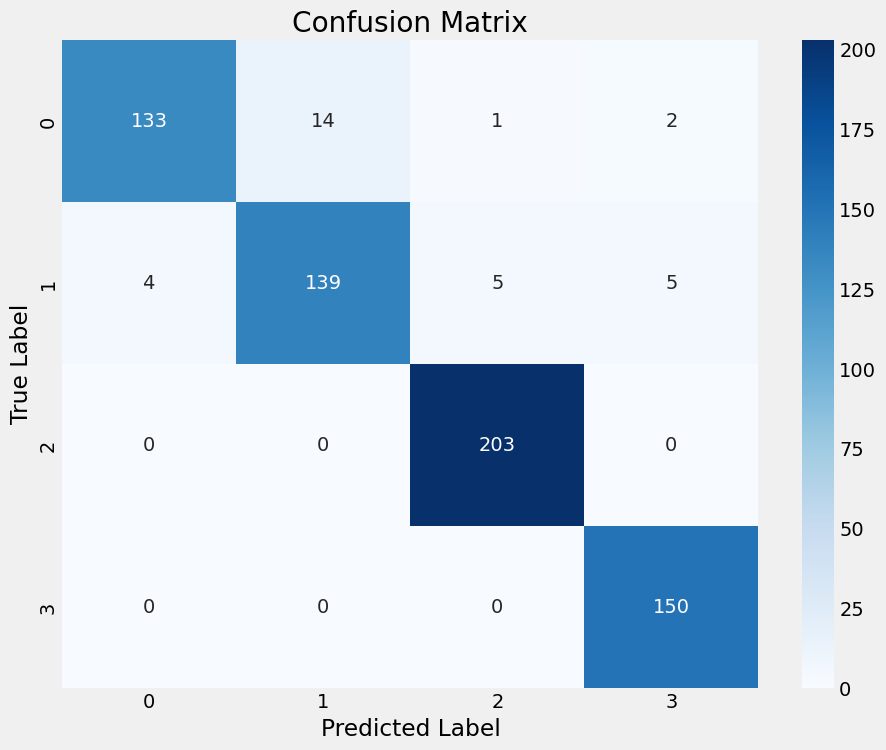

In [ ]:
preds = cnn_model.predict(ts_gen)
y_pred = np.argmax(preds,axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'notumor',
    3: 'pituitary'
}
# Then create and display the confusion matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
clr = classification_report(ts_gen.classes,y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       150
           1       0.91      0.91      0.91       153
           2       0.97      1.00      0.99       203
           3       0.96      1.00      0.98       150

    accuracy                           0.95       656
   macro avg       0.95      0.95      0.95       656
weighted avg       0.95      0.95      0.95       656



In [ ]:
cnn_model.save("cnn_model.h5")

In [11]:
! pip install streamlit pyngrok python-dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 4.9 MB/s eta 0:00:00


In [12]:
from threading import Thread
from pyngrok import ngrok
from google.colab import userdata

In [13]:
ngrok_token = userdata.get('NGROK_AUTH_TOKEN')
ngrok.set_auth_token(ngrok_token)

In [14]:
def run_streamlit():
  os.system("streamlit run /content/app.py --server.port 8501")

In [27]:
%%writefile app.py

import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import plotly.graph_objects as go
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
import google.generativeai as genai
import PIL.Image
import os
from google.colab import userdata
from dotenv import load_dotenv
load_dotenv()

genai.configure(api_key=os.getenv('GOOGLE_API_KEY'))

output_dir = 'saliency_maps'
os.makedirs(output_dir, exist_ok=True)

def generate_explaination(img_path, model_prediction,confidence):
  prompt = f"""You are an expert neurologist. You are tasked with explaining a sliency map of a brain tumor MRI scan.
  The saliency map was generated by a deep learning model that was tarined to classify brain tumors
  as either glioma, meningioma, pituitary, or no tumor.

  The Saliency map highlightsthe regions of the image that the machine learning model is focusing on to make the prediction.

  The deep learning model predicted the image to be of class '{model_prediction}' with a confidence of {confidence * 100}%.

  In your response:
    - Explain what regoins of the brain the model is focusing on, based on the saliency map. Refer to the regoins highlighed
    in light cyan, those are the regoins where the model is focusing on.
    - Explain possible reasons why the model made the prediction it did.
    - Don't mention anything like 'The saliency map highlights the regoins the model is focusing on, which are the light cyan'
    in your explanation.
    - Keep you r explanation to 4 sentences max.

    Let's think step by step about this. Verify step by step.
  """

  img = PIL.Image.open(img_path)

  model = genai.GenerativeModel(model_name="gemini-1.5-flash")
  response = model.generate_content([prompt,img])
  return response.text

def generate_saliency_map(model, img_array, class_index,img_size):
  with tf.GradientTape() as tape:
    img_tensor = tf.convert_to_tensor(img_array)
    tape.watch(img_tensor)
    predictions = model(img_tensor)
    target_class = predictions[:,class_index]
  gradients = tape.gradient(target_class, img_tensor)
  gradients = tf.math.abs(gradients)
  gradients = tf.reduce_max(gradients,axis=-1)
  gradients = gradients.numpy().squeeze()

  # Resize gradients to match origin image size
  gradient = cv2.resize(gradients, img_size)

  # Create a circular mask for the brain area
  center = (gradient.shape[0] // 2,gradients.shape[1]//2)
  radius = min(center[0],center[1]) -10
  y,x = np.ogrid[:gradients.shape[0],:gradients.shape[1]]
  mask = (x - center[0])**2 + (y - center[1])**2 <= radius**2

  # Apply mask to gradients
  gradients = gradients * mask

  # Normalize only the brain area
  brain_gradients = gradients[mask]
  if brain_gradients.max() > brain_gradients.min():
    brain_gradients = (brain_gradients - brain_gradients.min()) / (brain_gradients.max() - brain_gradients.min())
  gradients[mask] = brain_gradients

  # Apply a higher threshold
  threshold = np.percentile(gradients[mask],80)
  gradients[gradients < threshold] = 0

  # Apply more aggressive smothing
  gradients = cv2.GaussianBlur(gradients,(11,11),0)

  # Create a heatmap overlay with enhanced contrast
  heatmap = cv2.applyColorMap(np.uint8(255* gradients),cv2.COLORMAP_JET)
  heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

  # Resize heat to match original image size
  heatmap = cv2.resize(heatmap, img_size)

  # Superimpose the heatmap on original image with increased opacity
  original_img = image.img_to_array(img)
  superimposed_img = heatmap * 0.7 + original_img * 0.3
  superimposed_img = superimposed_img.astype(np.uint8)

  img_path = os.path.join(output_dir,uploaded_file.name)
  with open(img_path, "wb") as f:
    f.write(uploaded_file.getbuffer())
  saliency_map_path = f'saliency_map/{uploaded_file.name}'

  # Save the saliency map
  cv2.imwrite(saliency_map_path, cv2.cvtColor(superimposed_img,cv2.COLOR_RGB2BGR))
  return superimposed_img


def load_xception_model(model_path):
  img_shape=(299,299,3)
  base_model = tf.keras.applications.Xception(include_top=False, weights="imagenet", input_shape=img_shape, pooling='max')
  model = Sequential([
      base_model, Flatten(),Dropout(rate=0.3), Dense(128, activation='relu'), Dropout(rate=0.25), Dense(4, activation='softmax')
  ])
  model.build((None,)+ img_shape)

  # Compile the model
  model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])
  model.load_weights(model_path)
  return model

st.title("Brain Tumor Classification")
st.write("Upload an image of a brain MRI scan to classify.")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg","png"])

if uploaded_file is not None:
  selected_model = st.radio(
      "Selected Model",
      ("Transfer Learning - Xception", "Custom CNN")
  )
  if selected_model == "Transfer Learning - Xception":
    model = load_xception_model('/content/xception_model.weights.h5')
    img_size = (299,299)
  else:
    model = load_model('/content/cnn_model.h5')
    img_size = (224,224)

  labels = ['glioma', 'meningioma', 'notumor', 'pituitary']
  img= image.load_img(uploaded_file, target_size=img_size)
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0

  prediction = model.predict(img_array)
  # Get the class with the highest probability
  class_index = np.argmax(prediction[0])
  result = labels[class_index]

  st.write(f"Prediction Class: {result}")
  st.write("Prediction")
  for label,prob in zip(labels,prediction[0]):
    st.write(f"{label}: {prob:.4f}%")

  saliency_map = generate_saliency_map(model, img_array, class_index, img_size)

  col1, col2 = st.columns(2)
  with col1:
    st.image(uploaded_file,caption='Uploaded Image', use_container_width=True)
  with col2:
    st.image(saliency_map, caption='Saliency Map', use_container_width=True)

  st.write("## Classification Results")
  result_container = st.container()
  result_container = st.container()
  result_container.markdown(
      f"""
      <div style="background-color: #000000; color: #ffffff; padding:30px; border-radius: 15px;">
        <div style="display:flex; justify-content: space_between; align-items:center;">
          <div style="flex:1;text-align:center;">
            <h3 style'"color: #ffffff; margin-botton:10px; font-size:20px;">Prediction</h3>
            <p style="font-size:36px; font-weight:800;color:#FF0000;margin:0;">
            {result}
            </p>
          </div>
          <div style="width:2px;height:80px; background-color:#ffffff;margin:0 20px;"></div>
          <div style="flex:1; text-align:center;">
            <h3 style="color:#ffffff;margin-bottom:10px;font-size:20px;">Confidence</h3>
            <p style="font-size:36px; font-weight:800; color: #2196F3; margin:0;">
              {prediction[0][class_index]:.4%}
            </p>
          </div>
        </div>
      </div>
      """,
      unsafe_allow_html=True
    )
  # Prepare data for Plotly chart
  probabilities = prediction[0]
  sorted_indices = np.argsort(probabilities)[::-1]
  sorted_labels = [labels[i] for i in sorted_indices]
  sorted_probabilities = probabilities[sorted_indices]

  # Creat a Ploty bar chart
  fig = go.Figure(go.Bar(
      x=sorted_probabilities,
      y=sorted_labels,
      orientation='h',
      marker_color =['red' if label == result else 'blue' for label in sorted_labels]
  ))

  # Customize the chart layout
  fig.update_layout(
      title='Probabilities fo reach class',
      xaxis_title='Probability',
      yaxis_title='Class',
      height=400,
      width=600,
      yaxis=dict(autorange="reversed")
  )

  # Add value labels to the bars
  for i, prob in enumerate(sorted_probabilities):
    fig.add_annotation(
        x=prob,
        y=i,
        text=f'{prob:.4%}',
        showarrow=False,
        xanchor='left',
        xshift=5
    )

  # Display the Plotly chart
  st.plotly_chart(fig)

  saliency_map_path = f'saliency_maps/{uploaded_file.name}'
  explanation = generate_explaination(saliency_map_path,result,prediction[0][class_index])

  st.write("## Explanation")
  st.write(explanation)





Overwriting app.py


In [16]:
thread = Thread(target=run_streamlit)
thread.start()

In [17]:
public_url = ngrok.connect(addr='8501', proto='http', bind_tls=True)
print("Public URL: ",public_url)

Public URL:  NgrokTunnel: "https://5a15-35-197-93-73.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
# Disconnect NGROK
tunnels = ngrok.get_tunnels()
for tunnel in tunnels:
  print(f"Closing tunnels: {tunnel.public_url} -> {tunnel.config['addr']}")
  ngrok.disconnect(tunnel.public_url)

